In [1]:
%matplotlib ipympl

In [2]:
import sys
sys.path

from sys import platform
if platform == "linux" or platform == "linux2":
    print("on linux")
    sys.path.append('/home/peter/PHY487Research/JakeBlackmore-Diatomic-Py-4b2ce31/diatom')
else:
    print("on windows")
    sys.path.append(r'C:\Users\meshk\PHY487Project1\PHY487Research\JakeBlackmore-Diatomic-Py-4b2ce31\diatom')
print(sys.path)

on linux
['/home/peter/PHY487Research/NaCs_dc_stark', '/home/peter/anaconda3/lib/python311.zip', '/home/peter/anaconda3/lib/python3.11', '/home/peter/anaconda3/lib/python3.11/lib-dynload', '', '/home/peter/anaconda3/lib/python3.11/site-packages', '/home/peter/PHY487Research/JakeBlackmore-Diatomic-Py-4b2ce31/diatom']


In [3]:
import numpy
import matplotlib.pyplot as pyplot
import hamiltonian as hamiltonian
from constants import Na23Cs133
from scipy.constants import h
from numpy.linalg import eigh

In [22]:
Nmax=2
H0,Hz,Hdc,Hac = \
    hamiltonian.build_hamiltonians(Nmax,Na23Cs133,zeeman=False,Edc=True,ac=False)

I = 0 #W/m^2
E = numpy.linspace(0, 5, int(60))*1e5 #V/m
B = 0 #

H = H0[..., None]+\
    Hdc[..., None]*E
H = H.transpose(2,0,1)

energies, states = eigh(H)

In [23]:
print(len(energies[0]))

288


Text(0.5, 0, 'Electric Field (kV/cm)')

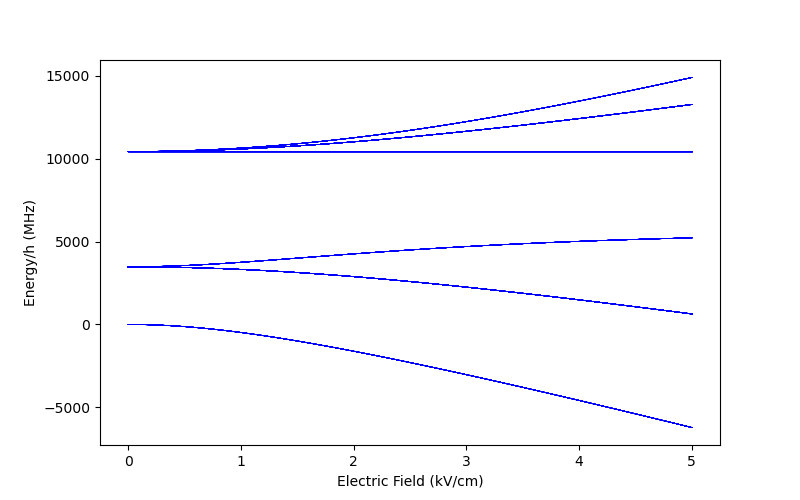

In [24]:
pyplot.close()

fig, ax = pyplot.subplots(figsize=(8, 5))

ax.plot(E*1e-5, energies[:,:]*1e-6/h, color='b', linewidth=0.5)
#ax.set_ylim(-4000, 10000)
#ax.set_xlim(0, 5)
ax.set_ylabel("Energy/h (MHz)")
ax.set_xlabel("Electric Field (kV/cm)")